In [17]:
import pandas as pd
import numpy as np

# camino de datos
path_clinico = 'data/Human__TCGA_LGG__MS__Clinical__Clinical__01_28_2016__BI__Clinical__Firehose.tsi.txt'
path_genes = 'data/Human__TCGA_LGG__UNC__RNAseq__HiSeq_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct'

# carga de datos
clin = pd.read_csv(path_clinico, sep='\t', index_col=0)
expr = pd.read_csv(path_genes, sep='\t', index_col=0)

print(f"Dimensión datos expresión: {expr.shape}")  # espera genes x muestras
print(f"Dimensión datos clínicos: {clin.shape}")


Dimensión datos expresión: (20086, 516)
Dimensión datos clínicos: (10, 515)


explicacion

In [18]:
# Ejemplo: listas simplificadas para immune y stromal genes (debes sustituir por los sets oficiales)
immune_genes = [
    "ACAP1", "ADAM28", "ADGRE3", "ATM", "BST2", "CD247", "CD27", "CD2", "CD3D", "CD3E",
    "CD3G", "CD52", "CD53", "CD6", "CD7", "CD8A", "CD8B", "CLEC4A", "CLEC7A", "CXCL9",
    "CXCR3", "CYBB", "DOCK2", "FCER1G", "FGR", "FOXP3", "GBP1", "GBP2", "GBP4", "GBP5",
    "GZMA", "GZMB", "HLA-DMA", "HLA-DMB", "HLA-DOA", "HLA-DOB", "HLA-DPA1", "HLA-DPB1",
    "HLA-DQA1", "HLA-DQA2", "HLA-DQB1", "HLA-DQB2", "HLA-DRA", "HLA-DRB1", "HLA-DRB5",
    "IFI16", "IFIH1", "IFIT3", "IL10RA", "IL2RA", "IRF8", "LAPTM5", "LAIR1", "LCP2", "LILRB2",
    "LILRB4", "LYN", "MS4A1", "MPEG1", "MX1", "NCKAP1L", "NLRC4", "NOD2", "NRP1", "P2RY12",
    "PTPRC", "PTPN7", "PTPN22", "SASH3", "SIRPA", "SLA", "SLAMF6", "SPI1", "STAT1", "STAT4",
    "SYK", "TBX21", "TLR1", "TLR3", "TLR6", "TLR7", "TREM2", "TRIM21", "TRIM68", "TYROBP",
    "WAS", "ZAP70", "CLEC12A", "S1PR4", "SPN", "CXCL10", "CXCL11", "CCL4", "CCL5", "CCR5",
    "CCR7", "CD40LG", "ITGAL", "PACSIN1", "SH2D1A", "PRKCB", "TAP1", "TAP2", "TAPBP",
    "TRIM25", "CD274", "PDCD1", "CTLA4", "TIGIT", "ICOS", "FOXP3", "IL7R", "GZMK", "NAT2",
    "HLA-A", "HLA-B", "HLA-C", "IFIT3"
]

stromal_genes = [
    "ABI3", "ACVRL1", "ADAM12", "ADAMTS12", "AEBP1", "AGRN", "ANGPT1", "ANTXR1",
    "AQP1", "ASPN", "BGN", "BMP4", "CDH11", "COL1A1", "COL1A2", "COL3A1", "COL5A1",
    "COL5A2", "COL6A1", "COL6A2", "COL6A3", "COL8A1", "COL8A2", "COMP", "CRTAC1",
    "DDIT4", "DCN", "DPT", "ELN", "ENG", "FAP", "FBN1", "FBLN2", "FBN3", "FCN3", "FGF7",
    "FHL2", "FLI1", "FN1", "FOXC1", "GJA4", "GJA5", "GLT8D2", "GREM1", "HAPLN1",
    "HAS2", "HGF", "HLF", "ICAM1", "IGFBP5", "ITGA11", "ITGA8", "ITGAX", "ITGB8",
    "JAM2", "KCNJ8", "KDR", "LAMA1", "LAMA2", "LAMA4", "LAMB1", "LAMC1", "LMO2",
    "MMP2", "MMP3", "MMP11", "MMP14", "MMP16", "MMP9", "MXRA5", "MYH11",
    "NID2", "PDGFA", "PDGFRA", "PDGFRB", "PECAM1", "PLOD1", "POSTN", "PTGS2",
    "RGS5", "RSPO3", "SCRG1", "SEMA3A", "SERPINE1", "SIGLEC1", "SLC2A3", "SLIT2",
    "SMOC2", "SPON1", "SPARC", "SPP1", "STC1", "TCF21", "TGFB3", "TIMP1", "TNC",
    "TNXB", "TPM1", "TPM2", "VCAN", "VWF", "WISP1", "XDH", "ZEB1", "ZNF423"
]

# Filtrar genes presentes en el dataset
immune_genes_present = [g for g in immune_genes if g in expr.index]
stromal_genes_present = [g for g in stromal_genes if g in expr.index]

print(f"Immune genes usados: {len(immune_genes_present)}")
print(f"Stromal genes usados: {len(stromal_genes_present)}")

# Calcular scores: promedio expresión de genes de cada set para cada muestra
immune_score = expr.loc[immune_genes_present].mean(axis=0)
stromal_score = expr.loc[stromal_genes_present].mean(axis=0)

# Score ESTIMATE aproximado como simple suma de scores
estimate_score = immune_score + stromal_score

# Unir en un DataFrame para análisis posterior
scores_df = pd.DataFrame({
    'immune_score': immune_score,
    'stromal_score': stromal_score,
    'estimate_score': estimate_score
})

scores_df.head()

Immune genes usados: 117
Stromal genes usados: 105


,immune_score,stromal_score,estimate_score
TCGA.CS.4938,5.967111,7.132758,13.099869
TCGA.CS.4941,8.132838,8.345325,16.478163
TCGA.CS.4942,7.464896,7.209186,14.674081
TCGA.CS.4943,6.138782,7.550289,13.689071
TCGA.CS.4944,6.482274,7.448770,13.931043


preprocesameinto clin

In [19]:
clin = clin.T
clin.head()

attrib_name,years_to_birth,Tumor_purity,histological_type,gender,radiation_therapy,race,ethnicity,overall_survival,status,overallsurvival
TCGA.CS.6665,51,0.6573,astrocytoma,female,yes,white,nothispanicorlatino,1568,0,"1568,0"
TCGA.CS.6670,43,0.9816,oligodendroglioma,male,NaN,white,nothispanicorlatino,1426,0,"1426,0"
TCGA.DB.A4XC,26,0.8892,oligoastrocytoma,male,yes,white,nothispanicorlatino,1421,0,"1421,0"
TCGA.DH.5141,32,0.9387,oligodendroglioma,male,yes,white,hispanicorlatino,968,0,"968,0"
TCGA.DH.A66B,52,0.8806,astrocytoma,male,yes,white,nothispanicorlatino,1279,0,"1279,0"


In [20]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, TCGA.CS.6665 to TCGA.WY.A85E
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   years_to_birth     514 non-null    object
 1   Tumor_purity       515 non-null    object
 2   histological_type  515 non-null    object
 3   gender             515 non-null    object
 4   radiation_therapy  482 non-null    object
 5   race               505 non-null    object
 6   ethnicity          481 non-null    object
 7   overall_survival   481 non-null    object
 8   status             481 non-null    object
 9   overallsurvival    515 non-null    object
dtypes: object(10)
memory usage: 44.3+ KB


In [21]:
clin['overall_survival'] = pd.to_numeric(clin['overall_survival'], errors='coerce') # pasar a dias numerico
clin = clin.drop(columns=['overallsurvival']) # eliminar por redundante

clin['years_to_birth'] = pd.to_numeric(clin['years_to_birth'], errors='coerce') # a numerico la edad

clin['Tumor_purity'] = pd.to_numeric(clin['Tumor_purity'], errors='coerce') # a float 

# categoriales
categorical_cols = ['histological_type', 'gender', 'radiation_therapy', 'race', 'ethnicity', 'status']
for col in categorical_cols:
    # Tomar valores no nulos y convertirlos a categorías
    clin[col] = clin[col].astype('category')

In [22]:
print(clin['status'].value_counts())

status
0    358
1    123
Name: count, dtype: int64


In [23]:
clin['status'] = pd.to_numeric(clin['status'], errors='coerce')

In [24]:
print(clin.isna().sum())

attrib_name
years_to_birth        1
Tumor_purity          0
histological_type     0
gender                0
radiation_therapy    33
race                 10
ethnicity            34
overall_survival     34
status               34
dtype: int64


In [27]:
clin = clin.dropna(subset=['overall_survival', 'status']) # eliminamos aquellos que no tengamos supervivencia y estado

In [28]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, TCGA.CS.6665 to TCGA.WY.A85E
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   years_to_birth     480 non-null    float64 
 1   Tumor_purity       481 non-null    float64 
 2   histological_type  481 non-null    category
 3   gender             481 non-null    category
 4   radiation_therapy  465 non-null    category
 5   race               472 non-null    category
 6   ethnicity          450 non-null    category
 7   overall_survival   481 non-null    float64 
 8   status             481 non-null    float64 
dtypes: category(5), float64(4)
memory usage: 38.0+ KB


In [29]:
clin.head()

attrib_name,years_to_birth,Tumor_purity,histological_type,gender,radiation_therapy,race,ethnicity,overall_survival,status
TCGA.CS.6665,51.0,0.6573,astrocytoma,female,yes,white,nothispanicorlatino,1568.0,0.0
TCGA.CS.6670,43.0,0.9816,oligodendroglioma,male,NaN,white,nothispanicorlatino,1426.0,0.0
TCGA.DB.A4XC,26.0,0.8892,oligoastrocytoma,male,yes,white,nothispanicorlatino,1421.0,0.0
TCGA.DH.5141,32.0,0.9387,oligodendroglioma,male,yes,white,hispanicorlatino,968.0,0.0
TCGA.DH.A66B,52.0,0.8806,astrocytoma,male,yes,white,nothispanicorlatino,1279.0,0.0


asociacion variables clinicas

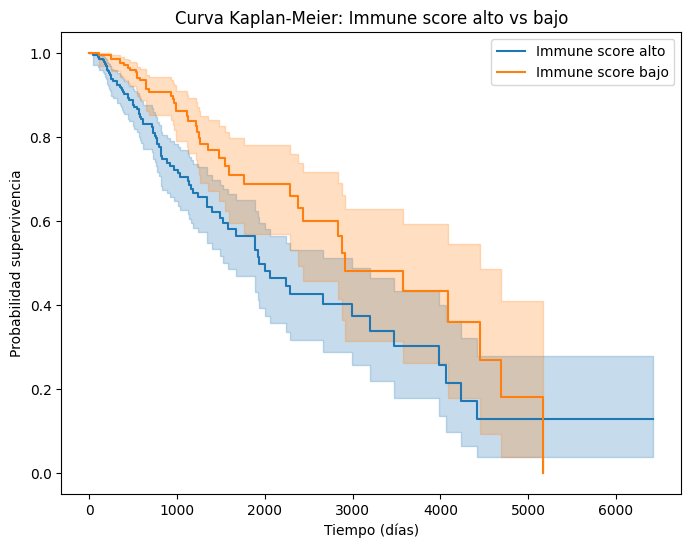

P-valor test log-rank (immune score): 0.0013


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Asegurarse que los índices coincidan
samples_intersect = clin.index.intersection(scores_df.index)
clin_sub = clin.loc[samples_intersect]
scores_sub = scores_df.loc[samples_intersect]

# Ejemplo visual: distribución immune_score por tumor grade
'''sns.boxplot(x=clin_sub['tumor_grade'], y=scores_sub['immune_score'])
plt.title('Immune score según grado tumoral')
plt.show()'''

# Definir grupos high y low según mediana es común
median_immune = scores_sub['immune_score'].median()
high_immune = scores_sub['immune_score'] >= median_immune

# Supervivencia Kaplan-Meier para high vs low immune
kmf = KaplanMeierFitter()
T = clin_sub['overall_survival']  # Tiempo supervivencia (ej: días)
E = clin_sub['status']  # Evento (1 muerto, 0 censurado)

plt.figure(figsize=(8,6))
kmf.fit(T[high_immune], event_observed=E[high_immune], label='Immune score alto')
ax = kmf.plot_survival_function()
kmf.fit(T[~high_immune], event_observed=E[~high_immune], label='Immune score bajo')
kmf.plot_survival_function(ax=ax)
plt.title('Curva Kaplan-Meier: Immune score alto vs bajo')
plt.xlabel('Tiempo (días)')
plt.ylabel('Probabilidad supervivencia')
plt.show()

# Test log-rank para comparar grupos
result_logrank = logrank_test(T[high_immune], T[~high_immune], event_observed_A=E[high_immune], event_observed_B=E[~high_immune])
print(f"P-valor test log-rank (immune score): {result_logrank.p_value:.4f}")
